Using TensorFlow backend.


(50000, 28, 28) (50000,)


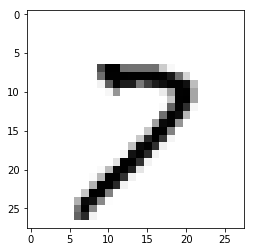

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[567], cmap="Greys");

In [2]:
import numpy as np
import tensorflow as tf

NUM_CL = 10
np.random.seed(42)

In [3]:
s = tf.InteractiveSession()

In [4]:
input_X = tf.placeholder(dtype= 'float64', shape = [None, 28, 28], name = 'X')
input_X_flat = tf.reshape(input_X, [-1, X_train.shape[1]*X_train.shape[2]])
input_y = tf.placeholder(dtype= 'uint8', shape = [None,], name = 'y')

lr = tf.placeholder(dtype = 'float32')

def create_model(unit1 = 32, unit2 = 32):
    #with tf.name_scope('layer1'):
    wt1 = tf.Variable(initial_value =
                      tf.truncated_normal([28*28, unit1], stddev=1.0/np.sqrt(28*28), dtype = 'float64'),
                        name = 'weight')
    bias1 = tf.Variable(tf.zeros([unit1], dtype = 'float64'), name = 'bias')
        
    layer1 = tf.nn.relu(tf.add(tf.matmul(input_X_flat, wt1), bias1))
        
    #with tf.name_scope('layer2'):
    wt2 = tf.Variable(initial_value = 
                      tf.truncated_normal([unit1, unit2], stddev=1.0/np.sqrt(unit1), dtype = 'float64'),
                                 name = 'weight')
    bias2 = tf.Variable(tf.zeros([unit2], dtype = 'float64'), name = 'bias')
        
    layer2 = tf.nn.relu(tf.add(tf.matmul(layer1, wt2), bias2))
        
    #with tf.name_scope('softmax_layer'):
    wt3 = tf.Variable(initial_value = 
                      tf.truncated_normal([unit2, NUM_CL], stddev=1.0/np.sqrt(unit2), dtype = 'float64'),
                                 name = 'weight')
    bias3 = tf.Variable(tf.zeros([NUM_CL], dtype = 'float64'), name = 'bias')
        
    class_prob = tf.nn.softmax(tf.add(tf.matmul(layer2, wt3), bias3), axis = 1)
        
    y_onehot = tf.one_hot(input_y, depth = 10, dtype = 'float64')
    loss = - tf.reduce_sum(tf.reduce_mean(y_onehot * tf.log(class_prob), axis = 0))

    model_optimizer = tf.train.MomentumOptimizer(lr, 0.5).minimize(
        loss, var_list = [wt1, bias1, wt2, bias2, wt3, bias3])
    
    return class_prob, model_optimizer, loss
    

In [5]:
class_prob, opt, loss = create_model(24, 24)
s.run(tf.global_variables_initializer())

batch_size = 50
learning_rate = 0.02
train_loss = []
test_loss = []



In [6]:
from tqdm import tnrange
num_epochs = 50
epoch = 0

while epoch < num_epochs:
    print('Starting epoch: ' + str(epoch))
    epoch += 1
    
    if epoch%10 == 0:
        learning_rate /= 1.2
        batch_size = int(batch_size * 1.2)
        print("Batch Size {}".format(batch_size))
    for i in tnrange(len(X_train)//batch_size):
        rind = np.random.choice(range(len(X_train)), batch_size)
        X_batch = X_train[rind, :, :]
        y_batch = y_train[rind]
        s.run(opt, {input_X: X_batch, input_y : y_batch, lr: learning_rate})

    train_loss.append(s.run(loss, {input_X : X_train, input_y: y_train}))
    test_loss.append(s.run(loss, {input_X : X_val, input_y: y_val}))
    print('validation loss: {}'.format(test_loss[-1]))

Starting epoch: 0



validation loss: 0.31004039305784625
Starting epoch: 1



validation loss: 0.2609671047299132
Starting epoch: 2



validation loss: 0.2068653669232285
Starting epoch: 3



validation loss: 0.18963760681817954
Starting epoch: 4



validation loss: 0.1714914779298402
Starting epoch: 5



validation loss: 0.17593998274988826
Starting epoch: 6



validation loss: 0.15720699988555487
Starting epoch: 7



validation loss: 0.14861490306012917
Starting epoch: 8



validation loss: 0.1452574339291613
Starting epoch: 9
Batch Size 60



validation loss: 0.14343631748259475
Starting epoch: 10



validation loss: 0.13951033083403896
Starting epoch: 11



validation loss: 0.13912502700388485
Starting epoch: 12



validation loss: 0.13518837094798586
Starting epoch: 13



validation loss: 0.13508735202665934
Starting epoch: 14



validation loss: 0.13174110184861967
Starting epoch: 15



validation loss: 0.13303197045704707
Starting epoch: 16



validation loss: 0.13507463760380764
Starting epoch: 17



validation loss: 0.13053994958556003
Starting epoch: 18



validation loss: 0.12750422187921406
Starting epoch: 19
Batch Size 72



validation loss: 0.13344320915667987
Starting epoch: 20



validation loss: 0.12755008780324173
Starting epoch: 21



validation loss: 0.1300655090916802
Starting epoch: 22



validation loss: 0.12537496885907276
Starting epoch: 23



validation loss: 0.12774581749580208
Starting epoch: 24



validation loss: 0.12425699452016725
Starting epoch: 25



validation loss: 0.12388124581150217
Starting epoch: 26



validation loss: 0.12618130159231467
Starting epoch: 27



validation loss: 0.13012221744873978
Starting epoch: 28



validation loss: 0.12367407640134416
Starting epoch: 29
Batch Size 86



validation loss: 0.1204300903654974
Starting epoch: 30



validation loss: 0.12331242730079006
Starting epoch: 31



validation loss: 0.12172186779622185
Starting epoch: 32



validation loss: 0.12371114212745676
Starting epoch: 33



validation loss: 0.1230900574324163
Starting epoch: 34



validation loss: 0.12096835166465175
Starting epoch: 35



validation loss: 0.12287145981278494
Starting epoch: 36



validation loss: 0.12299513469700891
Starting epoch: 37



validation loss: 0.12117478767124826
Starting epoch: 38



validation loss: 0.12423782535207939
Starting epoch: 39
Batch Size 103



validation loss: 0.12507033633564546
Starting epoch: 40



validation loss: 0.12425747338627391
Starting epoch: 41



validation loss: 0.12266666357826632
Starting epoch: 42



validation loss: 0.1250684250734592
Starting epoch: 43



validation loss: 0.1260900626139865
Starting epoch: 44



validation loss: 0.12418734120585623
Starting epoch: 45



validation loss: 0.12159082861886533
Starting epoch: 46



validation loss: 0.12308645935792167
Starting epoch: 47



validation loss: 0.12413850643699736
Starting epoch: 48



validation loss: 0.12336210198275142
Starting epoch: 49
Batch Size 123



validation loss: 0.12220767916936681


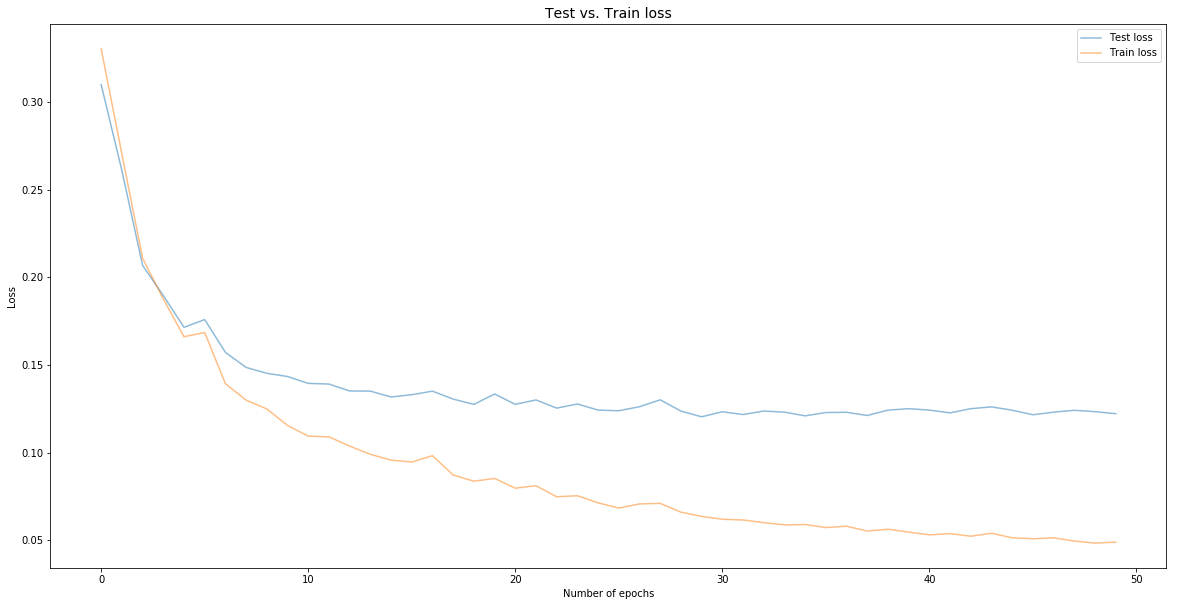

In [7]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title("Test vs. Train loss", fontsize = 14)
plt.plot(test_loss, label = "Test loss", alpha = .5)
plt.plot(train_loss, label = "Train loss", alpha = .5)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

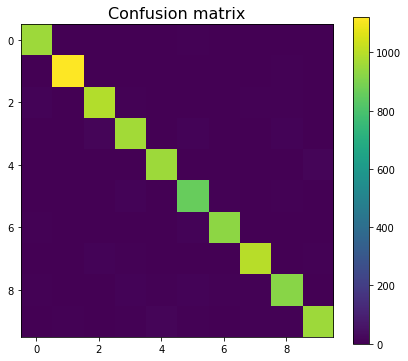

0.9656


In [8]:
# confusion matrix:
y_predicted = s.run(class_prob, {input_X: X_test, input_y : y_test})
y_predicted = np.argmax(y_predicted, axis=1)

# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predicted))

plt.colorbar()
plt.show()

print(np.mean(y_test == y_predicted))